# 
# Heart disease prediction

Attached to this ipynb are the following files:
1. heart_disease_prediction (this file)
2. cleveland.data
3. hungarian.data
4. long-beach-va.data
5. switzerland.data

<p>

The code are divided into three sections
1. Data pre-processing of heart disease data
2. Regression and classification of heart disease
3. Ensemble methods for predicting heart disease

## Data pre-processing 
In this part of a code, data pre-processing will be performed on the Heart Disease Dataset to ready it for subsequent analysis. This data consists of the following four files: `cleveland.data`, `hungarian.data`, `long-beach-va.data`, and `switzerland.data`. The dataset comprises a total of 920 instances, with each instance having 14 attributes.

The final attribute acts as the target variable, denoting whether a patient has heart disease. This variable is an integer, ranging from 0, indicating no presence of heart disease, to 4.

Experiments using the Heart Disease Database have often focused primarily on distinguishing between the presence (values 1, 2, 3, 4) and absence (value 0) of heart disease.

<p>

### Attribute Information:

14 attributes are included:
1. *age*: in years
2. *sex*: (1 = male; 0 = female)
3. *cp*: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. *trestbps*: resting blood pressure (in mm Hg on admission to the hospital)
5. *chol*: serum cholestoral in mg/dl (blood cholesterol level)
6. *fbs*: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. *restecg*: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. *thalach*: maximum heart rate achieved
9. *exang*: exercise induced angina (1 = yes; 0 = no)
10. *oldpeak*: ST depression induced by exercise relative to rest (a measure of abnormality in electrocardiograms)
11. *slope*: the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
12. *ca*: number of major vessels (0-3) colored by flourosopy
13. *thal*: a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. *target*: the predicted attribute

More information can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

<p>

### Part 1:

1. Load the Data: Import the heart disease dataset into a Pandas DataFrame, explore missing values, handle them, choose whether we want to use all of the categories in the *target* variable or only two (0 = no heart disease, 1 = heart disease present). 
2. Convert Categorical Features
3. Feature Scaling: 
4. Feature Engineering: creation of new features which could be important for forecasting heart disease, transformation of existing features:
5. Exploratory Data Analysis (EDA): Data Visualization and Correlation Analysis
6. Feature Selection: Feature Importance with Tree-Based Model and Regularization-Based Methods

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [5]:
# Exercise 1

# Loading the data. Missing value as "?" would become NaN
cleveland = pd.read_csv("cleveland.data", header = None, na_values='?')
hungarian = pd.read_csv("hungarian.data", header = None, na_values='?')
longbeach= pd.read_csv("long-beach-va.data", header = None, na_values='?')
swis = pd.read_csv("switzerland.data", header = None, na_values='?')

In [6]:
# Correct column names
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Rename the columns of the DataFrames
cleveland = cleveland.rename(columns=dict(zip(indices, column_names)))
hungarian = hungarian.rename(columns=dict(zip(indices, column_names)))
longbeach = longbeach.rename(columns=dict(zip(indices, column_names)))
swis = swis.rename(columns=dict(zip(indices, column_names)))

In [7]:
# Concatenate files into one Dataframe
data_frames = [cleveland, hungarian, longbeach, swis]
merged_data = pd.concat(data_frames)
merged_data = merged_data.reset_index(drop=True)
merged_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
916,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
917,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
918,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [8]:
# Check for NaN values
merged_data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [9]:
# Impute missing numerical values 
merged_data['trestbps'].fillna(merged_data['trestbps'].mean(), inplace=True)
merged_data['chol'].fillna(merged_data['chol'].mean(), inplace=True)
merged_data['thalach'].fillna(merged_data['thalach'].mean(), inplace=True)
merged_data['oldpeak'].fillna(merged_data['oldpeak'].mean(), inplace=True)

In [10]:
# Define the categorical variables with missing values
categorical_columns_with_missing = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Replace missing values with a new category label
for column in categorical_columns_with_missing:
    merged_data[column] = merged_data[column].fillna('Unknown')

In [11]:
# Check for NaN after removing mv
merged_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    float64
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  target    920 non-null    int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 100.8+ KB


In [13]:
hungarian.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64

In [14]:
merged_data['target'] = merged_data['target'].map(lambda x: 1 if x in [1, 2, 3, 4] else x)
merged_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
merged_data.shape

(920, 14)

#### Comment:


##### a. 

- Is there any difference in the completeness of the data across the four files? Are there any missing values? If so, how many?

Yes, in the file "cleveland" there is no missing values while in other three files missing values are present. In "hungarian" (782 missing values), "swiss"(273) and "long beach"(598). The highest number of missing values in each dataset is ca feature (Check for missing values swis.isnull().sum()).

- How will you handle missing values?

I decided all numerical features with NaN values assign to the mean value of a specific feature and for all categorical values add a new category that will represent those missing values. I assigned a unique label such as "Unknown". Also, one possible way was to delete all the rows with mv but in this case we would loss approximately 60% of the data which could be important for the further analysis.


##### b.

- Decide if you want to use all categories in the target variable or just two categories (0 = no presence of heart disease, 1 = presence of heart disease)
For the target variable, I would use only two categories (0 = no presence of heart disease, 1 = presence of heart disease). All values that is not zero (1,2,3) would become 1.

In [16]:
# Exercise 2

# Define the categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Convert the columns to categorical data types
merged_data[categorical_columns] = merged_data[categorical_columns].astype('category')
print(merged_data.dtypes)

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object


In [17]:
df = merged_data.copy()

In [18]:
# Exercise 3

# Define the continuous features for normalization
cont = ['age', 'trestbps', 'chol', 'oldpeak','thalach']

# Apply normalization using StandartScaler
scaler = StandardScaler()
merged_data[cont] = scaler.fit_transform(merged_data[cont])
merged_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.007386,1.0,1.0,0.698041,0.311021,1.0,2.0,0.495698,0.0,1.349421,3.0,0.0,6.0,0
1,1.432034,1.0,4.0,1.511761,0.797713,0.0,2.0,-1.175955,1.0,0.589832,2.0,3.0,3.0,1
2,1.432034,1.0,4.0,-0.658158,0.274289,0.0,2.0,-0.340128,1.0,1.634267,2.0,2.0,7.0,1
3,-1.752828,1.0,3.0,-0.115679,0.467130,0.0,0.0,1.968345,0.0,2.488805,3.0,0.0,3.0,0
4,-1.328180,0.0,2.0,-0.115679,0.044717,0.0,2.0,1.371326,0.0,0.494884,1.0,0.0,3.0,0


#### Comment: 

Continuous features such as age, trestbps, chol, oldpeak, thalach were normalized using Standart Scaler

In [19]:
merged_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.007386,1.0,1.0,0.698041,0.311021,1.0,2.0,0.495698,0.0,1.349421,3.0,0.0,6.0,0
1,1.432034,1.0,4.0,1.511761,0.797713,0.0,2.0,-1.175955,1.0,0.589832,2.0,3.0,3.0,1
2,1.432034,1.0,4.0,-0.658158,0.274289,0.0,2.0,-0.340128,1.0,1.634267,2.0,2.0,7.0,1
3,-1.752828,1.0,3.0,-0.115679,0.467130,0.0,0.0,1.968345,0.0,2.488805,3.0,0.0,3.0,0
4,-1.328180,0.0,2.0,-0.115679,0.044717,0.0,2.0,1.371326,0.0,0.494884,1.0,0.0,3.0,0


In [20]:
# Exercise 4

# Feature Engineering: 
# a. Create New Features: Construct additional features that may be significant for predicting heart disease. 
# b. Transform Existing Features: Consider transforming existing features into more meaningful representations

# a. Create New Features (age groups) and Maximum Heart Rate Achieved
df['age_group'] = pd.cut(df['age'], bins=[0, 45, 55, float('inf')], labels=['young', 'middle-aged', 'senior'])
df['max_hr'] = pd.qcut(df['thalach'], q=3, labels=['low', 'normal', 'high'])

# b. Transform Existing Features blood_pressure, chol_level from using features besfore scaling
df['blood_pressure'] = pd.cut(df['trestbps'], bins=[0, 120, 130, float('inf')], labels=['low', 'normal', 'high'])
df['chol_level'] = pd.cut(df['chol'], bins=[0, 200, 240, float('inf')], labels=['low', 'normal', 'high'])

# Display the value counts of each category
print(df['max_hr'].value_counts())

normal    333
low       310
high      277
Name: max_hr, dtype: int64


I added two new features such as age group and maximum heart rate achieved. People to 45 is named as young, 45-55 is middle age and 55+ is old. Maximum heart rate achieved were categorized into levels such as low, normal, and high. I decided to divide the values in the into three equal-sized bins.

I transformed two existing features chol and blood two the levels such as low, normal and high. To transform it I use medical range for this indexes (link to them you can find in the list of resources)

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,max_hr,blood_pressure,chol_level
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,senior,normal,high,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,senior,low,high,high
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,senior,normal,low,normal
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,young,high,normal,high
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,young,high,normal,normal


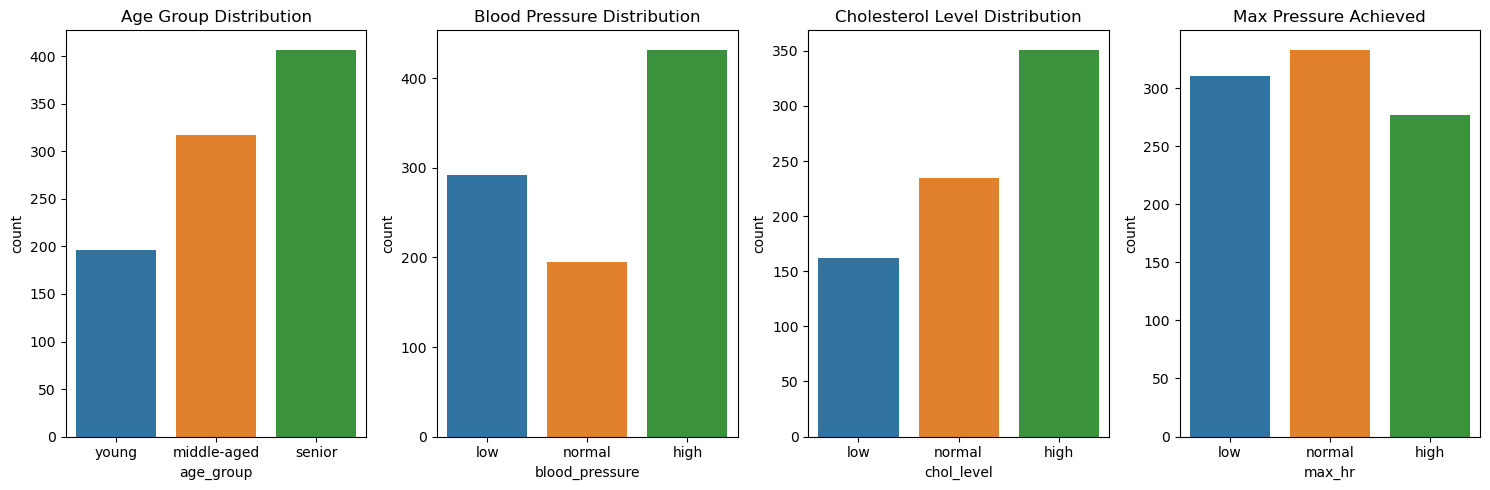

In [22]:
# Plot the distribution of each new feature you create to together with transformed
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

columns = ['age_group', 'blood_pressure', 'chol_level', 'max_hr']
titles = ['Age Group Distribution', 'Blood Pressure Distribution', 'Cholesterol Level Distribution', 'Max Pressure Achieved']

for i in range(len(columns)):
    sns.countplot(data=df, x=columns[i], ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [23]:
# Merge new features and transformed to the scaled dataframe
df_merged = pd.concat([merged_data, df['age_group'], df['blood_pressure'], df['chol_level'], df['max_hr']], axis=1)
df_merged.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,blood_pressure,chol_level,max_hr
0,1.007386,1.0,1.0,0.698041,0.311021,1.0,2.0,0.495698,0.0,1.349421,3.0,0.0,6.0,0,senior,high,normal,normal
1,1.432034,1.0,4.0,1.511761,0.797713,0.0,2.0,-1.175955,1.0,0.589832,2.0,3.0,3.0,1,senior,high,high,low
2,1.432034,1.0,4.0,-0.658158,0.274289,0.0,2.0,-0.340128,1.0,1.634267,2.0,2.0,7.0,1,senior,low,normal,normal
3,-1.752828,1.0,3.0,-0.115679,0.467130,0.0,0.0,1.968345,0.0,2.488805,3.0,0.0,3.0,0,young,normal,high,high
4,-1.328180,0.0,2.0,-0.115679,0.044717,0.0,2.0,1.371326,0.0,0.494884,1.0,0.0,3.0,0,young,normal,normal,high


In my opinion, transforming features are not beneficial in our case. Continuous variables can lose some information when they are categorized. We will lose the degree of detail in the original numerical values. Thus, all 4 features were added to the dataset as new.

In [24]:
df_merged.isnull().sum()

age                 0
sex                 0
cp                  0
trestbps            0
chol                0
fbs                 0
restecg             0
thalach             0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
target              0
age_group           0
blood_pressure      1
chol_level        172
max_hr              0
dtype: int64

In [25]:
# Categorical variables with missing values
missing = ['chol_level', 'blood_pressure']

# Replace missing values with a new category label
for column in missing:
    df_merged[column] = df_merged[column].cat.add_categories('Unknown').fillna('Unknown')
    
df_merged.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,blood_pressure,chol_level,max_hr
0,1.007386,1.0,1.0,0.698041,0.311021,1.0,2.0,0.495698,0.0,1.349421,3.0,0.0,6.0,0,senior,high,normal,normal
1,1.432034,1.0,4.0,1.511761,0.797713,0.0,2.0,-1.175955,1.0,0.589832,2.0,3.0,3.0,1,senior,high,high,low
2,1.432034,1.0,4.0,-0.658158,0.274289,0.0,2.0,-0.340128,1.0,1.634267,2.0,2.0,7.0,1,senior,low,normal,normal
3,-1.752828,1.0,3.0,-0.115679,0.467130,0.0,0.0,1.968345,0.0,2.488805,3.0,0.0,3.0,0,young,normal,high,high
4,-1.328180,0.0,2.0,-0.115679,0.044717,0.0,2.0,1.371326,0.0,0.494884,1.0,0.0,3.0,0,young,normal,normal,high


In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             920 non-null    float64 
 1   sex             920 non-null    category
 2   cp              920 non-null    category
 3   trestbps        920 non-null    float64 
 4   chol            920 non-null    float64 
 5   fbs             920 non-null    category
 6   restecg         920 non-null    category
 7   thalach         920 non-null    float64 
 8   exang           920 non-null    category
 9   oldpeak         920 non-null    float64 
 10  slope           920 non-null    category
 11  ca              920 non-null    category
 12  thal            920 non-null    category
 13  target          920 non-null    int64   
 14  age_group       920 non-null    category
 15  blood_pressure  920 non-null    category
 16  chol_level      920 non-null    category
 17  max_hr          

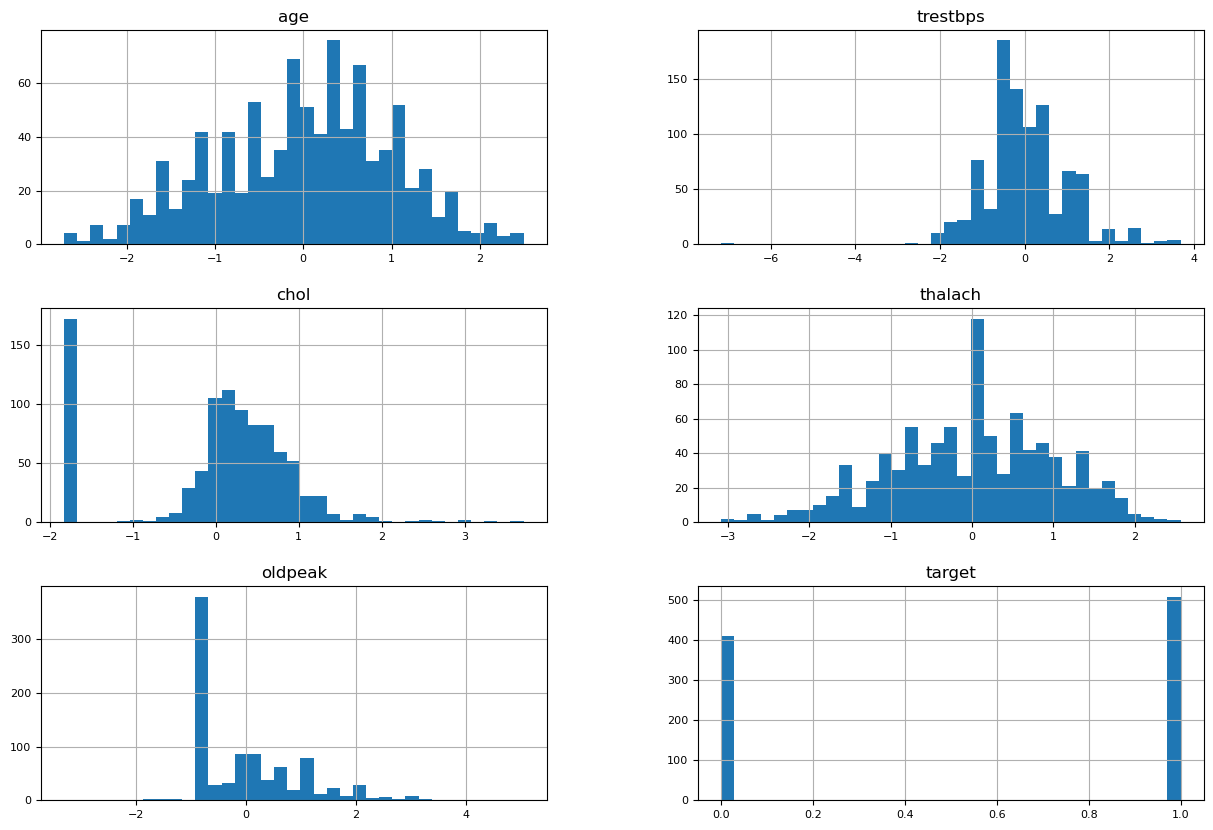

In [27]:
# Exercise 5
# Exploratory Data Analysis (EDA):

# a. Data Visualization: 

# Distribution for numerical values
df_merged.hist(figsize=(15, 10), bins=35, xlabelsize=8, ylabelsize=8);

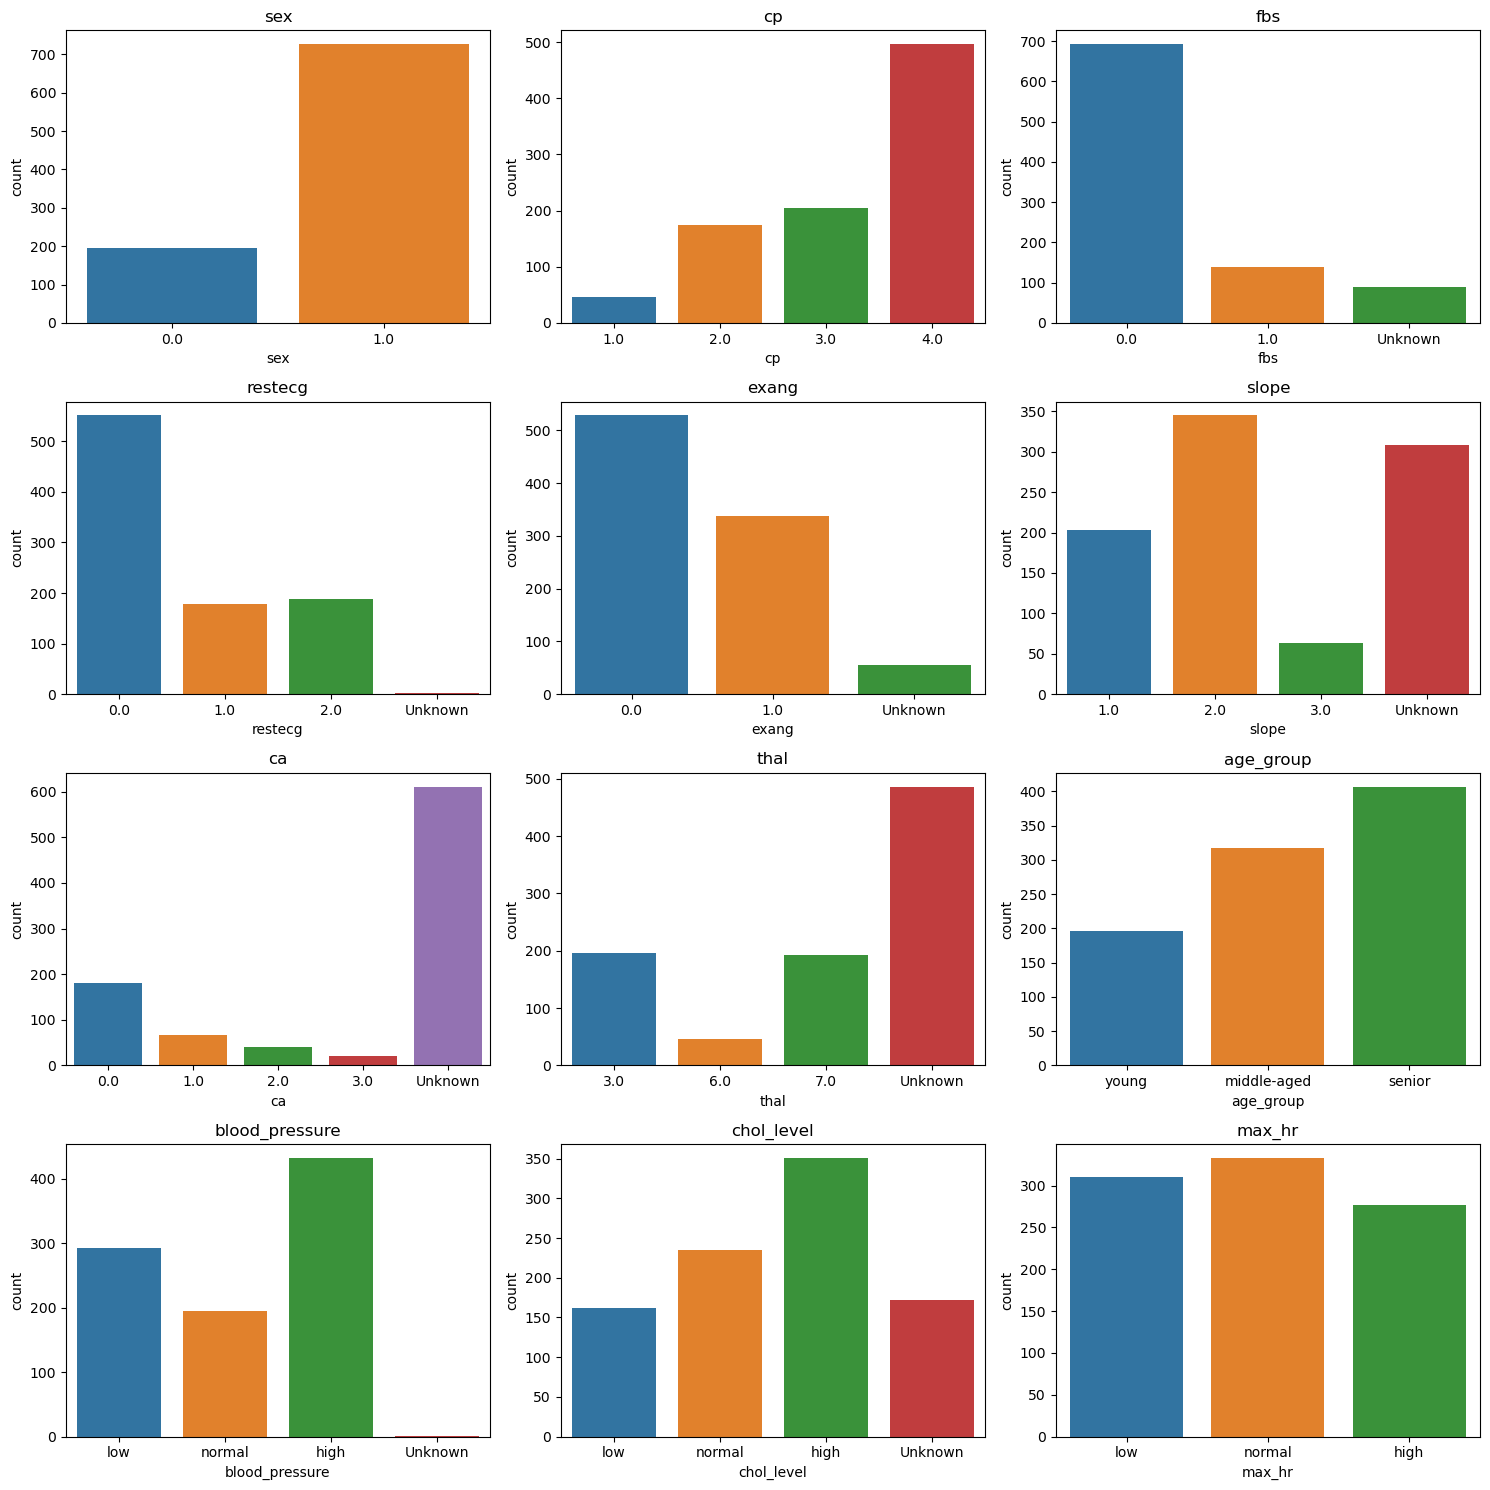

In [28]:
# Plot a distribution for categorical values

# Categorical values to plot
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',  'age_group', 'blood_pressure', 'chol_level', 'max_hr']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(categorical):
    ax = axes[i]
    sns.countplot(x=var, data=df_merged, ax=ax)
    ax.set_title(var)

fig.tight_layout()
plt.show()

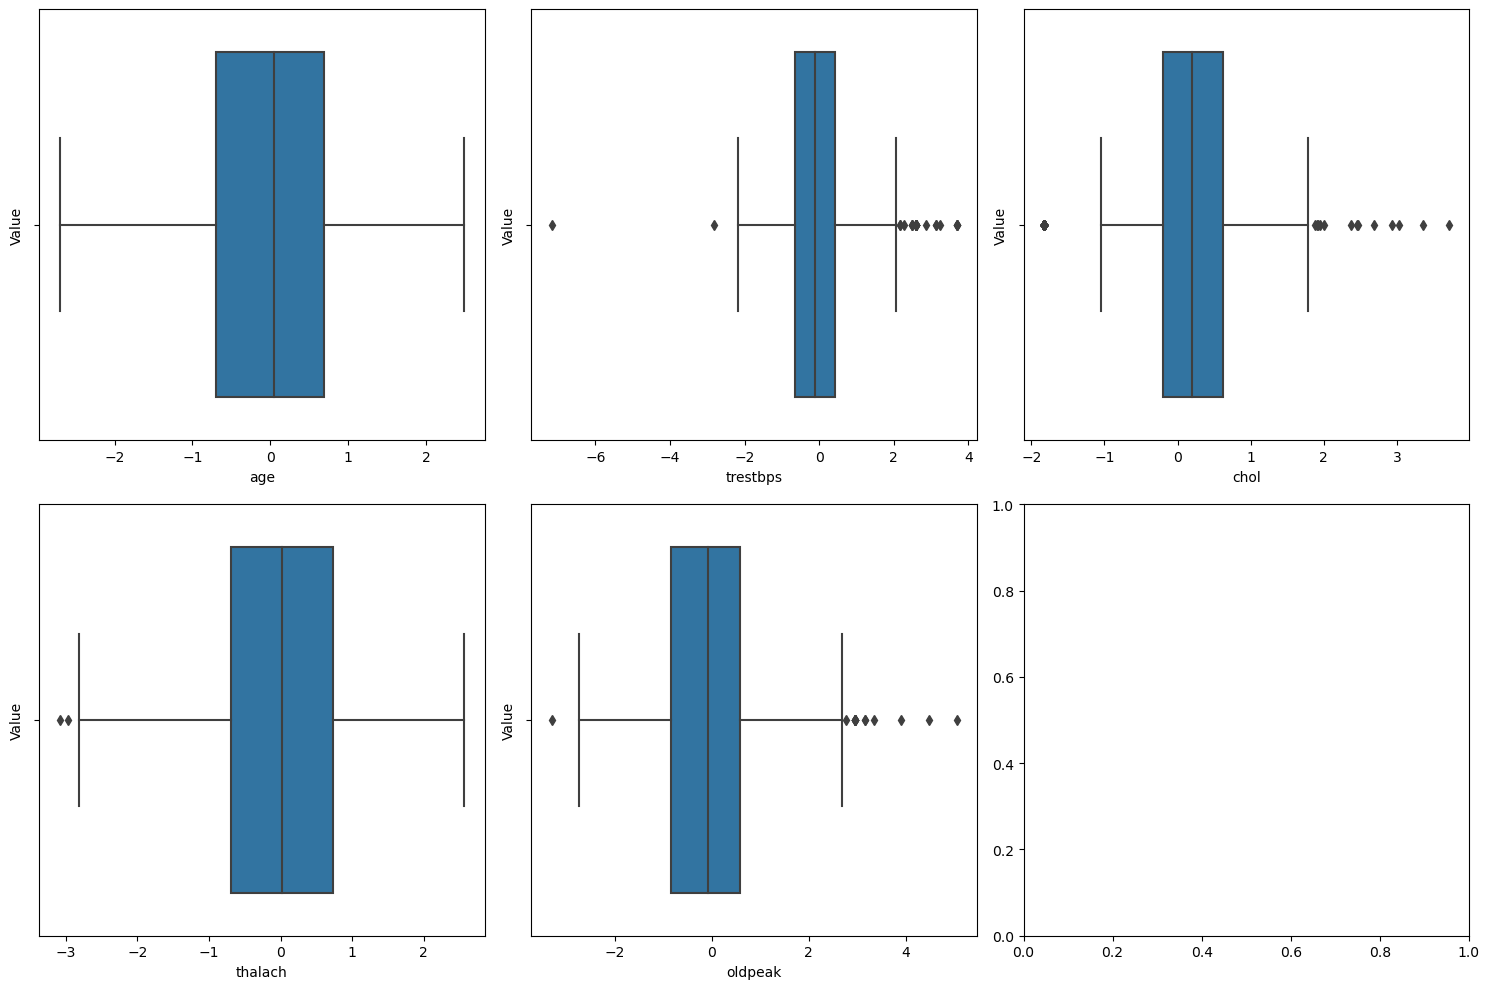

In [29]:
# Identify outliers for numerical values

# Numerical columns to plot
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=df_merged[column], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

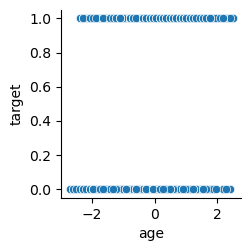

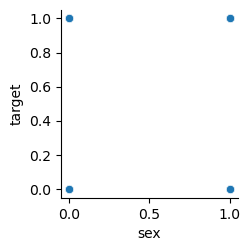

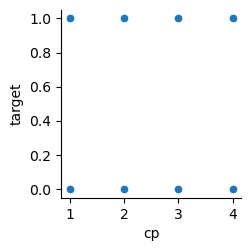

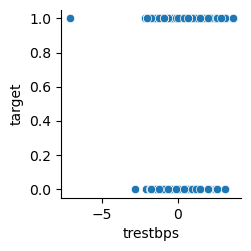

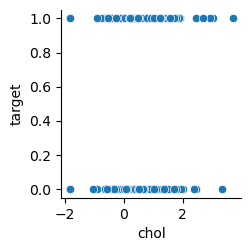

In [30]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] 

for i in range(0, len(numerical_columns)):
    sns.pairplot(data=df_merged,
                x_vars=df_merged.columns[i],
                y_vars=['target'])

In [31]:
df = df_merged.copy()

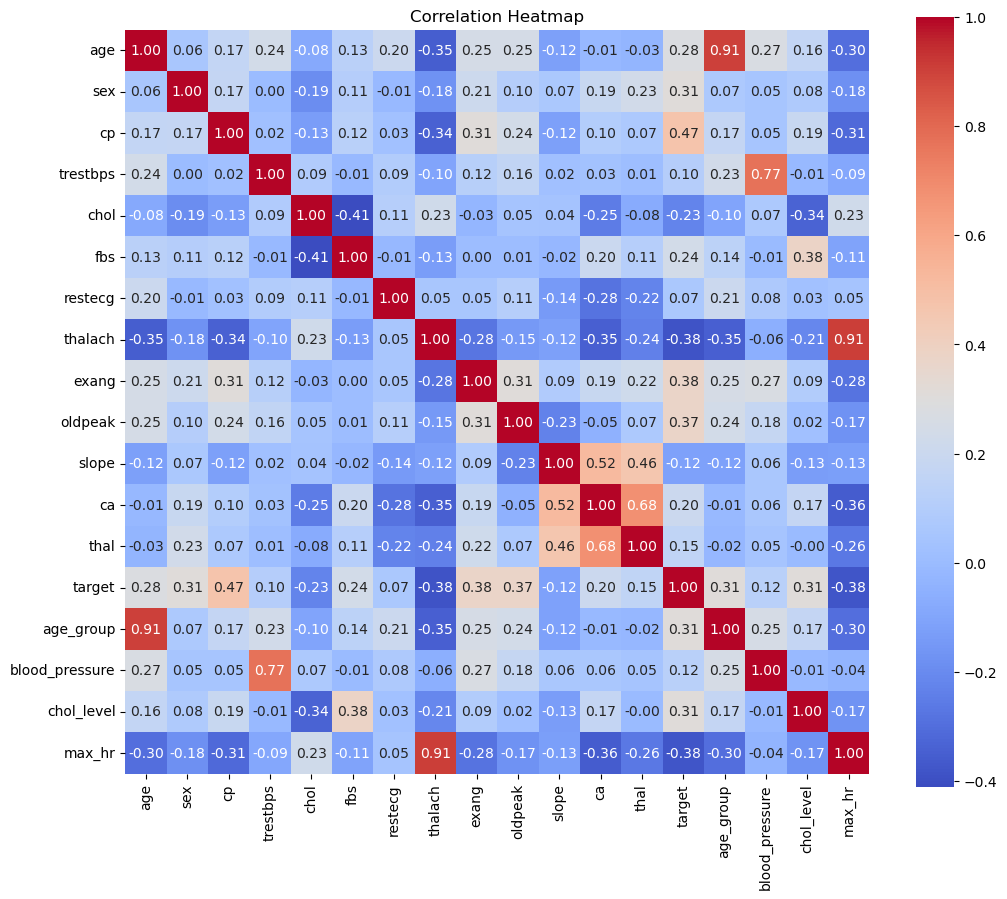

In [32]:
# b) Correlation Analysis 
df_selected = df_merged[df_merged.columns].copy()

# Convert categorical variables into numerical representation
for column in df_selected.select_dtypes(include='category'):
    df_selected[column] = df_selected[column].cat.codes

# Correlation matrix
correlation_matrix = df_selected.corr()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

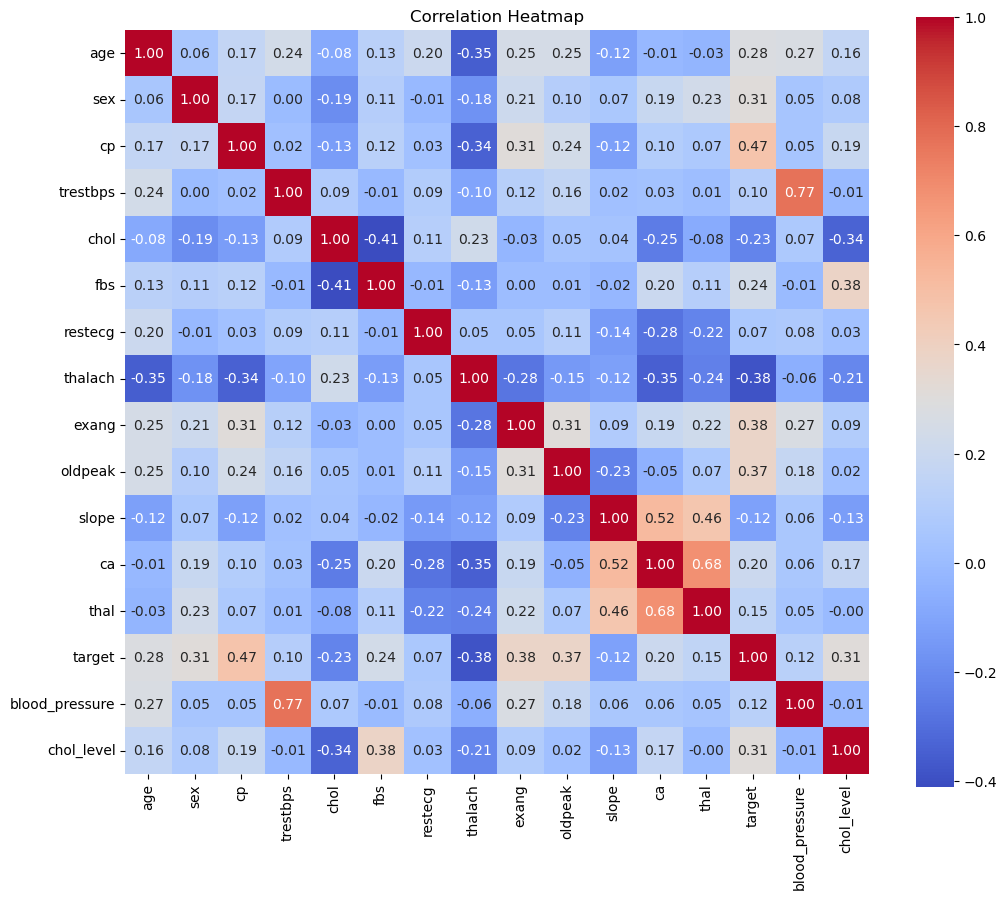

In [33]:
# Correlation heatmap without the highly correlated features
columns = df_merged.drop(['age_group','max_hr'], axis=1).columns
df_selected = df_merged[columns].copy()

# Convert categorical variables into numerical representation
for column in df_selected.select_dtypes(include='category'):
    df_selected[column] = df_selected[column].cat.codes

correlation_matrix = df_selected.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
# Exercise 6

# Perform one-hot encoding (since these features has "Unknown" category)
df_encoded = pd.get_dummies(df_merged, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group', 'blood_pressure', 'chol_level', 'max_hr'])
df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,blood_pressure_normal,blood_pressure_high,blood_pressure_Unknown,chol_level_low,chol_level_normal,chol_level_high,chol_level_Unknown,max_hr_low,max_hr_normal,max_hr_high
0,1.007386,0.698041,0.311021,0.495698,1.349421,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,1.432034,1.511761,0.797713,-1.175955,0.589832,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1.432034,-0.658158,0.274289,-0.340128,1.634267,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,-1.752828,-0.115679,0.467130,1.968345,2.488805,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
4,-1.328180,-0.115679,0.044717,1.371326,0.494884,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [35]:
df_encoded.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0.0',
       'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0',
       'fbs_Unknown', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0',
       'restecg_Unknown', 'exang_0.0', 'exang_1.0', 'exang_Unknown',
       'slope_1.0', 'slope_2.0', 'slope_3.0', 'slope_Unknown', 'ca_0.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_Unknown', 'thal_3.0', 'thal_6.0',
       'thal_7.0', 'thal_Unknown', 'age_group_young', 'age_group_middle-aged',
       'age_group_senior', 'blood_pressure_low', 'blood_pressure_normal',
       'blood_pressure_high', 'blood_pressure_Unknown', 'chol_level_low',
       'chol_level_normal', 'chol_level_high', 'chol_level_Unknown',
       'max_hr_low', 'max_hr_normal', 'max_hr_high'],
      dtype='object')

In [36]:
# Feature importance with Random Forest

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Dataframe with feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the importance score in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df.head(10))

      Feature  Importance
10     cp_4.0    0.078221
4     oldpeak    0.076237
3     thalach    0.070812
2        chol    0.068581
0         age    0.054113
1    trestbps    0.050487
18  exang_0.0    0.045035
19  exang_1.0    0.041942
8      cp_2.0    0.040027
25     ca_0.0    0.033247


##### Most relevant features: 
We can choose top 5 features which is cholesterol, chest pain type 4, maximum heart rate achieved, ST depression and age. We could also consider features top 10 features.

In [37]:
from sklearn.linear_model import Lasso, Ridge

# Lasso regression for feature selection
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
lasso_coefs = lasso_coefs.reindex(lasso_coefs['Coefficient'].abs().sort_values(ascending=False).index) #  sorting coefficients
print("Lasso Regression Feature Coefficients:")
print(lasso_coefs.head())

# Ridge regression for feature selection
ridge_model = Ridge(alpha=0.81)
ridge_model.fit(X_train, y_train)
ridge_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
ridge_coefs = ridge_coefs.sort_values(by='Coefficient', ascending=False)   # sorting coefficients
print("Ridge Regression Feature Coefficients:")
print(ridge_coefs.head())

Lasso Regression Feature Coefficients:
               Feature  Coefficient
10              cp_4.0     0.207150
25              ca_0.0    -0.177500
5              sex_0.0    -0.162382
44  chol_level_Unknown     0.140269
22           slope_2.0     0.112576
Ridge Regression Feature Coefficients:
                   Feature  Coefficient
17         restecg_Unknown     0.275749
40  blood_pressure_Unknown     0.189747
10                  cp_4.0     0.176356
44      chol_level_Unknown     0.169353
27                  ca_2.0     0.101231


##### Most relevant features by Regularization-Based Methods: 
We can choose top 5 features from Lasso Regression which is cp_4.0, ca_0.0, sex_0.0, chol_level_Unknown, slope_2.0. They differ from tree based model and the coefficients are lower compared with tree-based models.

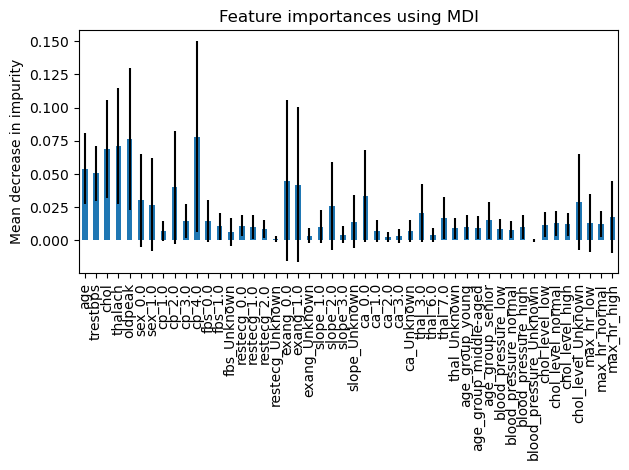

In [38]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### List of resources used:

- To find a blood pressure rate
https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

- To find a cholesterol rate
https://www.elo.health/biomarkers/total-cholesterol-overview/163/

- Plot distribution of numerical features
https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python

## 2. Regression and classification 

1. Linear Regression to predict the *age* attribute, using other numerical features in the heart disease dataset as predictors. 
2. Logistic Regressio to predict the presence of heart disease, as indicated by the *target* attribute.
3. Decision Tree Classifier to predict the presence of heart disease, as represented by the *target* attribute.
4.  Model Evaluation.

In [39]:
df_merged.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,blood_pressure,chol_level,max_hr
0,1.007386,1.0,1.0,0.698041,0.311021,1.0,2.0,0.495698,0.0,1.349421,3.0,0.0,6.0,0,senior,high,normal,normal
1,1.432034,1.0,4.0,1.511761,0.797713,0.0,2.0,-1.175955,1.0,0.589832,2.0,3.0,3.0,1,senior,high,high,low
2,1.432034,1.0,4.0,-0.658158,0.274289,0.0,2.0,-0.340128,1.0,1.634267,2.0,2.0,7.0,1,senior,low,normal,normal
3,-1.752828,1.0,3.0,-0.115679,0.467130,0.0,0.0,1.968345,0.0,2.488805,3.0,0.0,3.0,0,young,normal,high,high
4,-1.328180,0.0,2.0,-0.115679,0.044717,0.0,2.0,1.371326,0.0,0.494884,1.0,0.0,3.0,0,young,normal,normal,high


In [40]:
# Exercise 1

# Linear regression
features = ['trestbps', 'chol', 'thalach', 'oldpeak']
X = df_merged[features]
y = df_merged['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_regression = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse_regression)

r2_regression = r2_score(y_test, y_pred)
print("R-squared score:", r2_regression)

rmse_regression = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE", rmse_regression)

mae_regression = mean_absolute_error(y_test, y_pred)
print("MAE:", mae_regression)

Mean Squared Error: 0.8516404256722397
R-squared score: 0.22023882768680603
RMSE 0.9228436626386074
MAE: 0.7508156057902475


####  Choice of features and why  they are suitable predictors for the age attribute:

For predicting age I chose other numerical features such as trestbps, chol, thalach, oldpeak. Since this features can change with age as a result of lifestyle choices, food preferences, and general health we should include them into a prediction of age

In [41]:
from sklearn.linear_model import Lasso

# Lasso regression

features = ['trestbps', 'chol', 'thalach', 'oldpeak']
X = df_merged[features]
y = df_merged['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Lasso(alpha=0.1) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse_lasso)

r2_lasso = r2_score(y_test, y_pred)
print("R-squared score:", r2_lasso)

rmse_lasso = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse_lasso)

mae_lasso = mean_absolute_error(y_test, y_pred)
print("MAE:", mae_lasso)

Mean Squared Error: 0.9098116367032014
R-squared score: 0.16697732160860834
RMSE: 0.9538404671134484
MAE: 0.7639857149758993


Lasso gives lower score than Linear.

Accuracy: 0.801
Precision: 0.808
Recall: 0.834
F1: 0.821
ROC-AUC 0.8


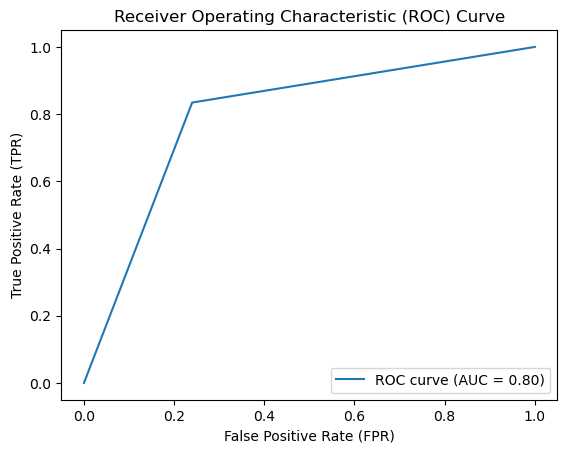

In [42]:
# Exercise 2

# Logistic Regression

top_features = importance_df.head(10)['Feature'].tolist()
X = df_encoded[top_features]
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the model's accuracy
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic.round(3))

precision_logistic = precision_score(y_test, y_pred)
print("Precision:", precision_logistic.round(3))

recall_logistic = recall_score(y_test, y_pred)
print("Recall:", recall_logistic.round(3))

f1_logistic = f1_score(y_test, y_pred)
print("F1:", f1_logistic.round(3))

roc_auc_logistic = roc_auc_score(y_test, y_pred)
print('ROC-AUC',roc_auc_logistic.round(2))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_logistic))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Choice of features: 
I selected top 10 features that I received from RandomForestClassifier from Assignment 1 (Exercise 6). They give higher results than regularization-based models

Accuracy: 0.8043478260869565
Precision: 0.805
Recall: 0.848
F1: 0.826
ROC-AUC 0.8


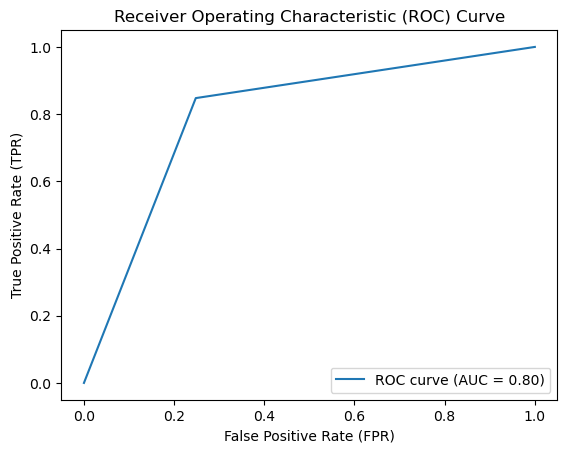

In [43]:
# Exercise 3

# DecisionTree with GridSearchCV

clf2 = DecisionTreeClassifier()

# Hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Grid search CV to find the best parameters
grid_search = GridSearchCV(clf2, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Model's performance
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

precision_dt = precision_score(y_test, y_pred)
print("Precision:", precision_dt.round(3))

recall_dt = recall_score(y_test, y_pred)
print("Recall:", recall_dt.round(3))

f1_dt = f1_score(y_test, y_pred)
print("F1:", f1_dt.round(3))

roc_auc_dt = roc_auc_score(y_test, y_pred)
print('ROC-AUC', roc_auc_dt.round(2))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Approach to configuring the decision tree 

I used GridSearchCV to find the optimal hyperparameters for the model. GridSearchCV thoroughly looks through a grid of parameters that I have set and identify the set of hyperparameters that produces the highest performance. The test set is then used to evaluate the best model's generalization potential. I chose this approach flexible, helps to find the best parameters and create a model which is more accurate.

In [44]:
# Exercise 4

# Model Evaluation

# Each metric where computed in Exercise 1 - Exercise 3. Thus, in this part we will print everything to compare and make some conclusions

print("Linear Regression")

print('Mean Squared Error:', mse_regression.round(3))
print("R-squared score:", r2_regression.round(3))
print("RMSE:", rmse_regression.round(3))
print("MAE:", mae_regression.round(3), '\n')


print("Logistic Regression")

print("Accuracy:", accuracy_logistic.round(3))
print("Precision:", precision_logistic.round(3))
print("Recall:", recall_logistic.round(3))
print("F1:", f1_logistic.round(3))
print("AUC-score", roc_auc_logistic.round(3), '\n')


print("Decision Tree")

print("Accuracy:", accuracy_dt.round(3))
print("Precision:", precision_dt.round(3))
print("Recall:", recall_dt.round(3))
print("F1:", f1_dt.round(3))
print("AUC-score", roc_auc_dt.round(3))

Linear Regression
Mean Squared Error: 0.852
R-squared score: 0.22
RMSE: 0.923
MAE: 0.751 

Logistic Regression
Accuracy: 0.801
Precision: 0.808
Recall: 0.834
F1: 0.821
AUC-score 0.797 

Decision Tree
Accuracy: 0.804
Precision: 0.805
Recall: 0.848
F1: 0.826
AUC-score 0.8


From above results we can say that Logistic Regression and Decision Tree are the good model to predict heart disease

#### Why did I select these metrics?:

For linear regression I used MSE, R^2, RMSE and MAE. It gives an indication of both the general model fit and the size of the forecast errors.

For Decision Tree and Logistic Regression I used accuracy, precision, recall, f1 score, auc-score because it is widely use in binary classification. These measures offer various perspectives on the model's performance, taking into account factors like overall correctness, accuracy of correctly predicted values, etc

- Precision: the number of true positive over the sum of the classes the model predicted as positive
- Recall: number of true positives over the sum of positive classes. 
- F1 score combines precision and recall and is defined by the harmonic mean of them.

Thus, these metrics offers further information about a predictive model's performance, as well as which classes are successfully and mistakenly predicted, and what kinds of errors are being made.





### List of resources used:

- For GridSearch in bagging classifier
https://stackoverflow.com/questions/47570307/tuning-parameters-of-the-classifier-used-by-baggingclassifier

## 3. Ensemble methods 


1. Implement a simple majority vote ensemble
2. Construct a bagging ensemble
3. Implement a random forest ensemble
4. Put together a boosting ensemble
5. Compare their performance

In [45]:
# Exercise 1

# Simple majority vote ensemble

top_features = importance_df.head(10)['Feature'].tolist()
X = df_encoded[top_features]
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The ensemble will contrain 3 decision trees
num_trees = 3

# Size of each random subset
subset_size = int(0.7 * len(X_train))  

ensemble = []  
accuracies_single = []    # the accuracy for a single decision tree 

for i in range(num_trees):
    tree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split =  4)
    subset_indices = np.random.choice(len(X_train), size=subset_size, replace=False)
    X_subset = X_train.iloc[subset_indices]
    y_subset = y_train.iloc[subset_indices]

    # Train the decision tree on the random subset
    tree.fit(X_subset, y_subset)

    # Add the trained decision tree to the ensemble
    ensemble.append(tree)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_single.append(accuracy)


voting_clf = VotingClassifier(estimators=[('tree{}'.format(i+1), tree) for i, tree in enumerate(ensemble)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

for i, ac in enumerate(accuracies_single):
    print(f'Accuracy decision tree {i+1}: {ac:.3f}')

print(f'Accuracy voting classifier: {accuracy:.3f}')

accuracy_vot= accuracy_score(y_test, y_pred)
precision_vot = precision_score(y_test, y_pred)
recall_vot = recall_score(y_test, y_pred)

Accuracy decision tree 1: 0.779
Accuracy decision tree 2: 0.801
Accuracy decision tree 3: 0.786
Accuracy voting classifier: 0.804


Comments: there are 3 trees in this ensemble. Size of each subsample is set to 75%. Parameters for decision tree were taken from the Decision Tree Classifier from Assignment 2 (Exercise 3)

In [46]:
# Exercise 2

# Bagging ensemble with many decision trees

base_estimator = DecisionTreeClassifier()

# Bagging classifier
bagging = BaggingClassifier(base_estimator=base_estimator)

# Parameter grid
param_grid = {
    'n_estimators': [3, 5, 10, 15],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Best parameters of the model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

accuracy_bagging = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_bagging)

accuracy_bag = accuracy_score(y_test, y_pred)
precision_bag = precision_score(y_test, y_pred)
recall_bag = recall_score(y_test, y_pred)

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 15}
Best score: 0.812233527131783
Accuracy: 0.8043478260869565


GridSearch is a search of all possible parameter combinations of the model that improves the internal score in the train set. It chose 15 trees for the prediction.

In [47]:
# Exercise 3
# Random forest ensemble

rf = RandomForestClassifier()

# Parameter grid
param_grid = {
    'n_estimators': [3, 5, 10, 20],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

precision_rf = precision_score(y_test, y_pred)
print("Precision:", precision_rf)

recall_rf = recall_score(y_test, y_pred)
print("Recall:", recall_rf)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
Best score: 0.8245639534883722
Accuracy: 0.8043478260869565
Precision: 0.8050314465408805
Recall: 0.847682119205298


In [48]:
# Exercise 4

# AdaBoost ensemble (with GridSearchCV)
base = DecisionTreeClassifier(max_depth=1)
boosting_clf = AdaBoostClassifier(base)

# Parameter grid
param_grid = {
    'n_estimators': [3, 5, 10, 20, 50],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=boosting_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_boosting_clf = grid_search.best_estimator_
y_pred = best_boosting_clf.predict(X_test)

# Model's performance
accuracy_ada = accuracy_score(y_test, y_pred)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Accuracy:", accuracy_ada)

precision_ada = precision_score(y_test, y_pred)
print("Precision:", precision_ada)

recall_ada = recall_score(y_test, y_pred)
print("Recall:", recall_ada)

Best parameters: {'learning_rate': 0.5, 'n_estimators': 20}
Best score: 0.8199733527131784
Accuracy: 0.8115942028985508
Precision: 0.8074534161490683
Recall: 0.8609271523178808


In [50]:
# Another boosting ensemble (Gradieng boosting Classifier)

boosting_clf = GradientBoostingClassifier()

# Parameter grid
param_grid = {
    'n_estimators': [3, 5, 10, 20, 50],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=boosting_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_boosting_clf = grid_search.best_estimator_
y_pred = best_boosting_clf.predict(X_test)

# Model's Performance
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred)
recall_gb = recall_score(y_test, y_pred)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)

Best parameters: {'learning_rate': 0.5, 'n_estimators': 5}
Best score: 0.8044089147286823
Accuracy: 0.8043478260869565
Precision: 0.7975460122699386
Recall: 0.8609271523178808


In [51]:
# Exercise 5

print('Accuracy voting classifier: ', accuracy.round(3), '\n')
print("Precision:", precision_vot)
print("Recall:", recall_vot, '\n')


print('Bagging Classifier')
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bag)
print("Recall:", recall_bag, '\n')


print('Random forest')
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf, '\n')


print('Gradient Boosting')
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)

Accuracy voting classifier:  0.804 

Precision: 0.8050314465408805
Recall: 0.847682119205298 

Bagging Classifier
Accuracy: 0.8043478260869565
Precision: 0.8050314465408805
Recall: 0.847682119205298 

Random forest
Accuracy: 0.8043478260869565
Precision: 0.8050314465408805
Recall: 0.847682119205298 

Gradient Boosting
Accuracy: 0.8043478260869565
Precision: 0.7975460122699386
Recall: 0.8609271523178808


### Comparison

The Random Forest ensemble model outperforms the Voting Classifier and Bagging Classifier in terms of accuracy, precision, and recall based on the provided performance criteria.

Model performance of the Bagging Classifier is similar to the Voting Classifier. Due to the fact that both methods rely on bagging, their similar performance can be associated with the shared idea of lowering variance and stabilizing predictions.

With an accuracy of 0.819, precision of 0.814, and recall of 0.868, the Random Forest model outperformed the Voting Classifier and Bagging Classifier. The Random Forest's feature randomization, which increases tree diversity and makes it possible to capture a wider variety of patterns and interactions in the data, is responsible for its improved performance.

The Voting and Bagging Classifiers perform similarly to Gradient Boosting.
